# Reading Callisto FITs files

In [4]:
# Import the usual suspects
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy import signal
from astropy.io import fits
import pandas as pd
import seaborn as sns

In [5]:
# show result from all calculations of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [67]:
# Astropy read fits
path = "../DATA/BINGO_20190528_123356_01.fit"
hdu = fits.open(path)

In [68]:
# Every fits file has an informative header.
# hdu[0].header

In [69]:
# This is a python dictionary
# Time interval
step = hdu[0].header["CDELT1"]
DATE = pd.to_datetime(hdu[0].header['DATE-OBS'])
TIME = pd.to_timedelta(hdu[0].header['TIME-OBS'])
INICIO = DATE + TIME
# retrieve time and trequency intervals
#Get Data
data = hdu[0].data.astype(np.float32)
time = hdu[1].data[0][0].astype(np.float32)
freq = hdu[1].data[0][1].astype(np.float32)
# clean frequency channels
frequency = freq[:-12]

#Create pandas datetime object
timeSeries = pd.date_range(INICIO, periods = data.shape[1], freq = '%fS' %step)
timeSeries = timeSeries.strftime('%H:%M:%S.%f')


hdu.close()

In [70]:
  def data2dB(data):
        digits2volt = 2500.0/255.0
        slope = 25.4
        return data*digits2volt/slope

In [71]:
data = (data2dB(data).T)

In [72]:
# Set dataframe
df = pd.DataFrame(data[:,:-12], index = timeSeries, columns = frequency)
df = df[df.columns[::-1]]
fmin = frequency.min()
fmax = frequency.max()


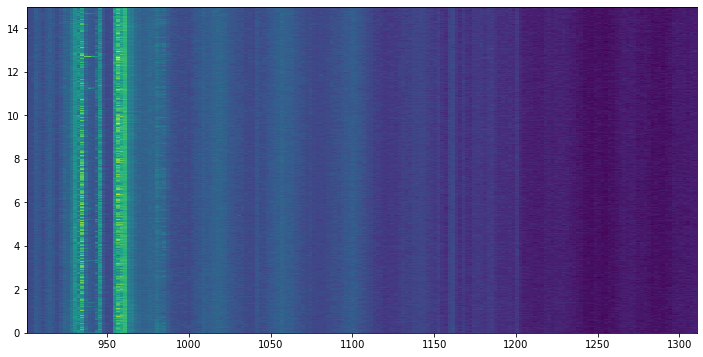

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(df, 
           cmap="viridis", 
           origin="lower", 
           aspect="auto", 
           interpolation="none", 
           extent=(fmin,fmax,0,15)
          )
plt.show();